<a href="https://colab.research.google.com/github/habbang8838/BDAA_treasure_in_data/blob/main/CJ%EC%A0%9C%EC%9D%BC%EC%A0%9C%EB%8B%B9_%EC%A3%BC%EB%AC%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd

In [181]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# 시각화 과정에서 한글 깨짐 방지!!!!

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline 

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [184]:
df = pd.read_excel('CJ제일제당 주문 데이터(전처리).xlsx')

In [185]:
df

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,진행단계,...,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리,판매액,주문월
0,2022-01-01 00:38:13,2022010111866837,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,kim6****,CHT,2022010111866837_1,배송완료,...,단일상품,LO1135162715,CJ 다담 된장찌개양념 530G x3,LO1135162715_1135162716,단일상품,16240,1,가공식품 > 장류 > 된장/쌈장/청국장,16240,1
1,2022-01-01 02:54:53,2022010111873735,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873735_1,배송완료,...,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33240,1
2,2022-01-01 02:56:35,2022010111873774,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873774_1,배송완료,...,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33240,1
3,2022-01-01 04:35:17,2022010111875631,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,happ****,CHT,2022010111875631_1,배송완료,...,단일상품,LO1517718327,CJ 다담 된장찌개양념 530G X 4개,LO1517718327_1517718328,단일상품,21660,1,가공식품 > 장류 > 된장/쌈장/청국장,21660,1
4,2022-01-01 08:00:37,2022010111879668,APP,일반주문,디폴트 채널상세,LPOINT통합회원,cats****,SCH비비고추어탕,2022010111879668_2,배송완료,...,단일상품,LO1249549902,비비고 남도식 추어탕 460Gx5개,LO1249549902_1249549903,단일상품,23680,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,23680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93315,2022-09-30 23:52:25,2022093018638708,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,cha2844,CHT,2022093018638708_1,배송완료,...,단일상품,LO1520770627,[CJ직배송]더건강한 닭가슴살 직화 스테이크100G X 6개,LO1520770627_1520770628,단일상품,17400,1,가공식품 > 통조림/캔 > 닭가슴살통조림,17400,9
93316,2022-09-30 23:52:41,2022093018638709,APP,일반주문,디폴트 채널상세,LPOINT통합회원,wocns2,CHT,2022093018638709_1,배송완료,...,비비고 사골곰탕 500g x18봉,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869755,비비고 사골곰탕 500g x18봉,24500,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,49000,9
93317,2022-09-30 23:56:28,2022093018639349,APP,일반주문,디폴트 채널상세,LPOINT통합회원,xraydos,RSI,2022093018639349_1,배송완료,...,햇반 매일오곡밥 210Gx24개,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869753,햇반 매일오곡밥 210Gx24개,37000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,37000,9
93318,2022-09-30 23:58:52,2022093018639892,APP,일반주문,[링크프라이스] CPS_롯데온,LPOINT통합회원,badamit,NaN,2022093018639892_1,배송완료,...,프리미엄 육수세트 18봉[한우사골곰탕+진국육수 3종],LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869749,프리미엄 육수세트 18봉[한우사골곰탕+진국육수 3종],38000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,38000,9


재구매율은 중요하다

In [186]:
df['아이디'].nunique()

51324

In [187]:
len(df)

93320

# 시간대 및 유입채널에 대한 대분류 칼럼을 추가

In [188]:
df['시간대'] = df['주문접수일시'].dt.hour

In [189]:
df['시간대 대분류'] = '21 ~ 00'
df.loc[(df['시간대'] >= 0) & (df['시간대'] < 3),'시간대 대분류'] = '00 ~ 03'
df.loc[(df['시간대'] >= 3) & (df['시간대'] < 6),'시간대 대분류'] = '03 ~ 06'
df.loc[(df['시간대'] >= 6) & (df['시간대'] < 9),'시간대 대분류'] = '06 ~ 09'
df.loc[(df['시간대'] >= 9) & (df['시간대'] < 12),'시간대 대분류'] = '09 ~ 12'
df.loc[(df['시간대'] >= 12) & (df['시간대'] < 15),'시간대 대분류'] = '12 ~ 15'
df.loc[(df['시간대'] >= 15) & (df['시간대'] < 18),'시간대 대분류'] = '15 ~ 18'
df.loc[(df['시간대'] >= 18) & (df['시간대'] < 21),'시간대 대분류'] = '18 ~ 21'

# 유입채널을 크게 제가 5가지로 분류해보도록 하겠습니다.

- 1 - 유실 채널 상세, 디폴트 채널 상세로 앱에서 들어 가서 직접 찾는 경우(오리지날 방법)
- 2 - 가격비교 사이트 들어가서 찾은 경우
- 3 - 모바일(카카오톡, 공유하기 등)
- 4 - 검색 기능으로 찾은 경우
- 5 - 기타(롯데ON, 혹은 그 이외의 이벤트 )

In [190]:
df['유입채널 대분류'] = '기타 및 이벤트 광고'
df.loc[((df['유입채널'] == '유실 채널상세') | (df['유입채널'] == '디폴트 채널상세')), '유입채널 대분류'] = 'CJ 앱/사이트'
df.loc[df['유입채널'].str.contains('가격비교'), '유입채널 대분류'] = '가격비교'
df.loc[df['유입채널'].str.contains('모바일'), '유입채널 대분류'] = '모바일 공유'
df.loc[df['유입채널'].str.contains('검색'), '유입채널 대분류'] = '검색'

In [191]:
df['유입채널 대분류'].value_counts()

CJ 앱/사이트       74046
가격비교           10890
기타 및 이벤트 광고     4872
모바일 공유          2033
검색              1479
Name: 유입채널 대분류, dtype: int64

In [192]:
# id 및 유입채널 별로 분석하기 위해, 데이터프레임에서 필요한 변수 위주로만 남겨놓겠습니다.
df.columns
df = df[['주문접수일시', '주문번호', '유입채널 대분류', '시간대 대분류', '주문월', '아이디', '판매자상품명', '판매가', '표준카테고리']]

In [193]:
df

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
0,2022-01-01 00:38:13,2022010111866837,가격비교,00 ~ 03,1,kim6****,CJ 다담 된장찌개양념 530G x3,16240,가공식품 > 장류 > 된장/쌈장/청국장
1,2022-01-01 02:54:53,2022010111873735,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
2,2022-01-01 02:56:35,2022010111873774,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3,2022-01-01 04:35:17,2022010111875631,가격비교,03 ~ 06,1,happ****,CJ 다담 된장찌개양념 530G X 4개,21660,가공식품 > 장류 > 된장/쌈장/청국장
4,2022-01-01 08:00:37,2022010111879668,CJ 앱/사이트,06 ~ 09,1,cats****,비비고 남도식 추어탕 460Gx5개,23680,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
...,...,...,...,...,...,...,...,...,...
93315,2022-09-30 23:52:25,2022093018638708,가격비교,21 ~ 00,9,cha2844,[CJ직배송]더건강한 닭가슴살 직화 스테이크100G X 6개,17400,가공식품 > 통조림/캔 > 닭가슴살통조림
93316,2022-09-30 23:52:41,2022093018638709,CJ 앱/사이트,21 ~ 00,9,wocns2,[L포인트 3000p 증정]★LAST DAY EVENT★,24500,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
93317,2022-09-30 23:56:28,2022093018639349,CJ 앱/사이트,21 ~ 00,9,xraydos,[L포인트 3000p 증정]★LAST DAY EVENT★,37000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
93318,2022-09-30 23:58:52,2022093018639892,기타 및 이벤트 광고,21 ~ 00,9,badamit,[L포인트 3000p 증정]★LAST DAY EVENT★,38000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


# idea : 아이디별로 묶어서 특정 회원의 주문을 분석하도록 하겠습니다.

## 주문 횟수가 1~2회인 회원의 경우 패턴을 파악하기가 어렵기에, 그래도 3회 이상이었던 회원들에 한해서 주문 패턴을 파악하기!

In [194]:
df['아이디'].value_counts().loc[lambda x: x>= 3]

****          354
love****      220
blue****      196
csh3718       165
jung****      135
             ... 
glob****        3
fhtepgusal      3
ischo228        3
casc****        3
okji****        3
Name: 아이디, Length: 5777, dtype: int64

In [195]:
df['아이디'].value_counts() >= 3

****         True
love****     True
blue****     True
csh3718      True
jung****     True
            ...  
na1222      False
jj88****    False
ototen      False
ym6509      False
RoseNED     False
Name: 아이디, Length: 51324, dtype: bool

In [196]:
df['아이디'].value_counts().loc[lambda x: x>= 3].index

Index(['****', 'love****', 'blue****', 'csh3718', 'jung****', 'yoon****',
       'youn****', 'jackal1104', 'urimiracle', 'dpalwl12',
       ...
       'chrh****', 'kjw9****', 'limm****', 'w00j00452', 'hyoung0919',
       'glob****', 'fhtepgusal', 'ischo228', 'casc****', 'okji****'],
      dtype='object', length=5777)

In [177]:
# df_up3 = df[df['아이디'] in df['아이디'].value_counts().loc[lambda x: x>= 3].index]
# 자꾸 에러가 발생하네요 ㅠㅠ

-  이 코드 실행하는데 2분 정도 걸립니다. 인내심을 갖고 기다려주시면 감사하겠습니다....
-  파이썬은 왜 SQL문 처럼 df['아이디'] in ['abcd', 'efgh'] 형식처럼 아이디가 리스트 안에 있는 값만 추출과 같은 기능이 없을까요..
-  너무 번거롭네요...

In [197]:
# 먼저 id가 3회 이상 나온 데이터에 한해서만 저장하도록 할게요!!

df_id = df[df['아이디'] == df['아이디'].value_counts().loc[lambda x: x>= 3].index[0]]
for i in range(1, len(df['아이디'].value_counts().loc[lambda x: x>= 3].index)):
    df_id = df_id.append(df[df['아이디'] == df['아이디'].value_counts().loc[lambda x: x>= 3].index[i]])
df_id.head()

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
136,2022-01-03 21:28:10,2022010312336885,CJ 앱/사이트,21 ~ 00,1,****,CJ 고메 바삭튀겨낸통등심돈카츠 450Gx3개,26980,냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스
137,2022-01-03 21:28:10,2022010312336885,CJ 앱/사이트,21 ~ 00,1,****,[CJ직배송] CJ 고메 함박스테이크 152gx10개,24040,정육/계란 > 양념육 > 기타양념육
138,2022-01-03 21:28:19,2022010312336909,CJ 앱/사이트,21 ~ 00,1,****,CJ 옥수수식빵믹스 760G x4,15900,가공식품 > 밀가루/믹스류 > 베이킹믹스
241,2022-01-05 14:14:06,2022010512614715,CJ 앱/사이트,12 ~ 15,1,****,CJ 비비고 한입떡갈비150g*10개,20000,냉장/냉동/간편식 > 돈가스/고로케/너겟 > 너겟
259,2022-01-05 20:33:06,2022010512663419,가격비교,18 ~ 21,1,****,[CJ직배송]더건강한 닭가슴살 직화 통살구이100G X 6개,12000,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지


In [198]:
# 일단 아이디가 저렇게 *로 되거나 null 값인 경우는 같은 회원으로 보기 어려워 삭제해줄게요~~

df_id = df_id[(df_id['아이디'] != '*') & (df_id['아이디'] != '**') & 
                  (df_id['아이디'] != '***') & (df_id['아이디'] != '****') & (df_id['아이디'] != '')]

In [199]:
len(df_id) # 34710개의 데이터가 들어갔네요...

34710

In [200]:
df_id.head()

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
448,2022-01-07 06:55:35,2022010712865549,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
449,2022-01-07 06:57:53,2022010712865633,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
1277,2022-01-10 09:36:32,2022011013280036,검색,09 ~ 12,1,love****,CJ 고메 중화짜장 760Gx3개,21530,가공식품 > 면류 > 중화면
1303,2022-01-10 11:56:34,2022011013300449,CJ 앱/사이트,09 ~ 12,1,love****,[CJ직배송]CJ비비고왕교자1.05KG X 2개,19920,냉장/냉동/간편식 > 떡볶이/만두 > 만두
1349,2022-01-10 16:28:22,2022011013337258,가격비교,15 ~ 18,1,love****,[CJ직배송]쉐프솔루션 고기만땅왕교자 1.05KG X3개,20940,냉장/냉동/간편식 > 떡볶이/만두 > 만두


# 자, 이제 최소 주문을 3회 이상했던 친구들의 데이터를 다음과 같이 데이터프레임으로 모아줬습니다.

In [201]:
df_id

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
448,2022-01-07 06:55:35,2022010712865549,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
449,2022-01-07 06:57:53,2022010712865633,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
1277,2022-01-10 09:36:32,2022011013280036,검색,09 ~ 12,1,love****,CJ 고메 중화짜장 760Gx3개,21530,가공식품 > 면류 > 중화면
1303,2022-01-10 11:56:34,2022011013300449,CJ 앱/사이트,09 ~ 12,1,love****,[CJ직배송]CJ비비고왕교자1.05KG X 2개,19920,냉장/냉동/간편식 > 떡볶이/만두 > 만두
1349,2022-01-10 16:28:22,2022011013337258,가격비교,15 ~ 18,1,love****,[CJ직배송]쉐프솔루션 고기만땅왕교자 1.05KG X3개,20940,냉장/냉동/간편식 > 떡볶이/만두 > 만두
...,...,...,...,...,...,...,...,...,...
24844,2022-06-08 19:13:02,2022060814395675,CJ 앱/사이트,18 ~ 21,6,casc****,육개장 X 5개 + 사골곰탕 X2개 +육개장300g 증정,24000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
38236,2022-06-25 17:55:19,2022062516572532,CJ 앱/사이트,15 ~ 18,6,casc****,[CJ직배송]햇반 매일찰잡곡밥 210G*3 X6개,26920,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
6562,2022-03-15 21:52:39,2022031512208872,CJ 앱/사이트,21 ~ 00,3,okji****,[CJ직배송] 햇반 작은공기 130GX24개,36800,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
28544,2022-06-09 23:00:26,2022060914561585,CJ 앱/사이트,21 ~ 00,6,okji****,미역국 X 5개 + 사골곰탕 X2개+ 영양꼬리곰탕 1봉 증정,22000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


# 0. 아이디별로 주문을 파악해보겠습니다.

In [232]:
# df_id.to_csv('CJ 아이디별 조회.csv', encoding='utf-8')

In [234]:
df_id = pd.read_csv('CJ 아이디별 조회.csv')

In [235]:
df_id

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
0,2022-01-07 06:55:35,2022010712865550,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
1,2022-01-07 06:57:53,2022010712865630,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
2,2022-01-10 09:36:32,2022011013280040,검색,09 ~ 12,1,love****,CJ 고메 중화짜장 760Gx3개,21530,가공식품 > 면류 > 중화면
3,2022-01-10 11:56:34,2022011013300450,CJ 앱/사이트,09 ~ 12,1,love****,[CJ직배송]CJ비비고왕교자1.05KG X 2개,19920,냉장/냉동/간편식 > 떡볶이/만두 > 만두
4,2022-01-10 16:28:22,2022011013337260,가격비교,15 ~ 18,1,love****,[CJ직배송]쉐프솔루션 고기만땅왕교자 1.05KG X3개,20940,냉장/냉동/간편식 > 떡볶이/만두 > 만두
...,...,...,...,...,...,...,...,...,...
34705,2022-06-08 19:13:02,2022060814395670,CJ 앱/사이트,18 ~ 21,6,casc****,육개장 X 5개 + 사골곰탕 X2개 +육개장300g 증정,24000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
34706,2022-06-25 17:55:19,2022062516572530,CJ 앱/사이트,15 ~ 18,6,casc****,[CJ직배송]햇반 매일찰잡곡밥 210G*3 X6개,26920,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
34707,2022-03-15 21:52:39,2022031512208870,CJ 앱/사이트,21 ~ 00,3,okji****,[CJ직배송] 햇반 작은공기 130GX24개,36800,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
34708,2022-06-09 23:00:26,2022060914561580,CJ 앱/사이트,21 ~ 00,6,okji****,미역국 X 5개 + 사골곰탕 X2개+ 영양꼬리곰탕 1봉 증정,22000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


In [202]:
df_id_test = df_up3.groupby(['아이디']).count()

In [203]:
df_id_cond = df_up3_test0[df_id_test['주문접수일시'] >= 2]

In [204]:
df_id_cond # 내림차순으로 정렬!!

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,판매자상품명,판매자상품명,판매가,표준카테고리
아이디,,,,,,,,,
-_-i****,14,14,14,14,14,14,14,14,14
-_-ing,7,7,7,7,7,7,7,7,7
0104****,3,3,3,3,3,3,3,3,3
0107****,15,15,15,15,15,15,15,15,15
0109eun,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
zzongroo,3,3,3,3,3,3,3,3,3
zzorock,3,3,3,3,3,3,3,3,3
zzqz****,3,3,3,3,3,3,3,3,3


In [205]:
df_id_cond.sort_values(by='주문접수일시', ascending=False)

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,판매자상품명,판매자상품명,판매가,표준카테고리
아이디,,,,,,,,,
love****,220,220,220,220,220,220,220,220,220
blue****,196,196,196,196,196,196,196,196,196
csh3718,165,165,165,165,165,165,165,165,165
jung****,135,135,135,135,135,135,135,135,135
yoon****,130,130,130,130,130,130,130,130,130
...,...,...,...,...,...,...,...,...,...
km92****,3,3,3,3,3,3,3,3,3
kma1****,3,3,3,3,3,3,3,3,3
kma1119,3,3,3,3,3,3,3,3,3


In [206]:
df_id_cond[df_id_cond['주문접수일시'] == 220].index

Index(['love****'], dtype='object', name='아이디')

In [207]:
df_220 = df_id[df_id['아이디'] == 'love****']

In [230]:
df_220

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
448,2022-01-07 06:55:35,2022010712865549,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
449,2022-01-07 06:57:53,2022010712865633,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
1277,2022-01-10 09:36:32,2022011013280036,검색,09 ~ 12,1,love****,CJ 고메 중화짜장 760Gx3개,21530,가공식품 > 면류 > 중화면
1303,2022-01-10 11:56:34,2022011013300449,CJ 앱/사이트,09 ~ 12,1,love****,[CJ직배송]CJ비비고왕교자1.05KG X 2개,19920,냉장/냉동/간편식 > 떡볶이/만두 > 만두
1349,2022-01-10 16:28:22,2022011013337258,가격비교,15 ~ 18,1,love****,[CJ직배송]쉐프솔루션 고기만땅왕교자 1.05KG X3개,20940,냉장/냉동/간편식 > 떡볶이/만두 > 만두
...,...,...,...,...,...,...,...,...,...
44336,2022-07-06 03:12:42,2022070618027367,CJ 앱/사이트,03 ~ 06,7,love****,[햇반 솥반 X 서울체크인]햇반 솥반 7종,27000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
44337,2022-07-06 03:12:42,2022070618027367,CJ 앱/사이트,03 ~ 06,7,love****,햇반/쿡반불고기주먹밥500G+햇반/쿡반김치치즈주먹밥500G+햇반/쿡반버터장조림주먹밥...,31000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
44451,2022-07-06 15:59:10,2022070618106972,기타 및 이벤트 광고,15 ~ 18,7,love****,[파티컵증정]고메 순살 후라이드 치킨 550gx3개,27090,냉장/냉동/간편식 > 피자/핫도그/햄버거 > 피자/햄버거
44452,2022-07-06 15:59:10,2022070618106972,기타 및 이벤트 광고,15 ~ 18,7,love****,고메 바삭쫄깃한 탕수육 450gx3개,28340,냉장/냉동/간편식 > 동그랑땡/전/튀김 > 튀김류


In [208]:
df_220['시간대 대분류'].value_counts()

21 ~ 00    50
15 ~ 18    37
00 ~ 03    33
12 ~ 15    26
18 ~ 21    26
09 ~ 12    23
06 ~ 09    16
03 ~ 06     9
Name: 시간대 대분류, dtype: int64

<AxesSubplot:xlabel='시간대 대분류', ylabel='count'>

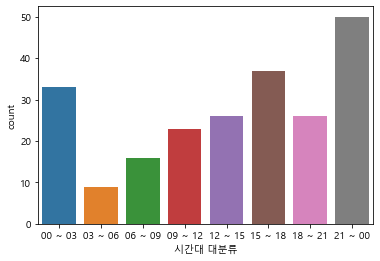

In [209]:
sns.countplot(x='시간대 대분류', data=df_220, order=['00 ~ 03', '03 ~ 06', '06 ~ 09', '09 ~ 12', '12 ~ 15', '15 ~ 18', '18 ~ 21', '21 ~ 00'])

In [212]:
df_220_1 = df_220[df_220['유입채널 대분류'] == 'CJ 앱/사이트']
# 직접 CJ를 통해 구매하는 회원

<AxesSubplot:xlabel='시간대 대분류', ylabel='count'>

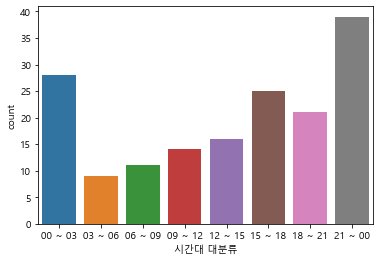

In [213]:
sns.countplot(x='시간대 대분류', data=df_220_1, order=['00 ~ 03', '03 ~ 06', '06 ~ 09', '09 ~ 12', '12 ~ 15', '15 ~ 18', '18 ~ 21', '21 ~ 00'])

### -> 이 회원은 주로 21 ~ 00시, 00 ~ 03시 야간 시간대에 많이 주문함을 알 수 있습니다.

# 1. 아이디와 상품명으로 그룹화하여 개인별 구매 패턴을 확인해보겠습니다.

In [214]:
df_id_test1 = df_id.groupby(['아이디', '판매자상품명']).count()

In [215]:
# 그래도 2번 이상 특정 회원이 특정 상품을 구매한 데이터들에 대하여 패턴을 찾는 것이 중요할 것이라고 생각하였습니다.
# 변수별로 na 값이 아니고서야, count수가 모두 같기에, 대표하는 변수 '주문접수 일시'로 검색하였습니다.

df_id_cond1 = df_id_test1[df_id_test1['주문접수일시'] >= 2]

In [216]:
df_id_cond1 # 내림차순으로 정렬!!

주문접수일시  주문번호  \
아이디       판매자상품명                                                             
-_-i****  [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                          5     5   
          [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                           5     5   
          비비고 새우왕교자 315G*2EA *2                                    4     4   
-_-ing    [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                          5     5   
0107****  [Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1...      10    10   
...                                                              ...   ...   
zzorock   [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00...       2     2   
zzqz****  [비비고X사내맞선]깻잎고기만두x4개+수제 버섯소고기만두+고기만두200g증정                2     2   
zzx1832aa 비비고 사골곰탕 500g x18봉                                       3     3   
zzzz****  [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정        2     2   
          [CJ직배송]포도씨유 900ML X 2개                                   2     2   

                                                              유입채널 대분류  \
아이디       판매자상품명                                                         
-_-i****  [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                            5   
          [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                             5   
          비비고 새우왕교자 315G*2EA *2                                      4   
-_-ing    [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                            5   
0107****  [Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1...        10   
...                                                                ...   
zzorock   [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00...         2   
zzqz****  [비비고X사내맞선]깻잎고기만두x4개+수제 버섯소고기만두+고기만두200g증정                  2   
zzx1832aa 비비고 사골곰탕 500g x18봉                                         3   
zzzz****  [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정          2   
          [CJ직배송]포도씨유 900ML X 2개                                     2   

                                                              시간대 대분류  주문월  \
아이디       판매자상품명                                                             
-_-i****  [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                           5    5   
          [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                            5    5   
          비비고 새우왕교자 315G*2EA *2                                     4    4   
-_-ing    [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                           5    5   
0107****  [Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1...       10   10   
...                                                               ...  ...   
zzorock   [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00...        2    2   
zzqz****  [비비고X사내맞선]깻잎고기만두x4개+수제 버섯소고기만두+고기만두200g증정                 2    2   
zzx1832aa 비비고 사골곰탕 500g x18봉                                        3    3   
zzzz****  [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정         2    2   
          [CJ직배송]포도씨유 900ML X 2개                                    2    2   

                                                              판매가  표준카테고리  
아이디       판매자상품명                                                           
-_-i****  [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                       5       5  
          [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                        5       5  
          비비고 새우왕교자 315G*2EA *2                                 4       4  
-_-ing    [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                       5       5  
0107****  [Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1...   10      10  
...                                                           ...     ...  
zzorock   [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00...    2       2  
zzqz****  [비비고X사내맞선]깻잎고기만두x4개+수제 버섯소고기만두+고기만두200g증정             2       2  
zzx1832aa 비비고 사골곰탕 500g x18봉                                    3       3  
zzzz****  [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정     2       2  
          [CJ직배송]포도씨유 900ML X 2개                                2       2  

[4248 rows x 7 columns]

In [217]:
df_id_cond1.sort_values(by='주문접수일시', ascending=False)

주문접수일시  주문번호  유입채널 대분류  \
아이디        판매자상품명                                                              
csh3718    [CJ직배송]햇반 흑미밥 210gX36개[1박스]                   144   144       144   
jackal1104 [CJ직배송]햇반작은공기130G x36개                         95    95        95   
yoon****   햇반 작은공기/100% 현미밥130g x 36개                     69    69        69   
ts2c****   햇반 작은공기/100% 현미밥130g x 36개                     64    64        64   
prosea119  CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개                 53    53        53   
...                                                      ...   ...       ...   
jjin****   [2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기       2     2         2   
           [CJ직배송]햇반 발아현미밥 작은공기 130G*3번들 X7개               2     2         2   
jjm0****   [CJ직배송]  고메 치즈크리스피핫도그 425g X 3개                 2     2         2   
jjm5and2   [CJ직배송]햇반 100%현미로 지은밥 130G x36개                 2     2         2   
zzzz****   [CJ직배송]포도씨유 900ML X 2개                          2     2         2   

                                                      시간대 대분류  주문월  판매가  \
아이디        판매자상품명                                                         
csh3718    [CJ직배송]햇반 흑미밥 210gX36개[1박스]                    144  144  144   
jackal1104 [CJ직배송]햇반작은공기130G x36개                          95   95   95   
yoon****   햇반 작은공기/100% 현미밥130g x 36개                      69   69   69   
ts2c****   햇반 작은공기/100% 현미밥130g x 36개                      64   64   64   
prosea119  CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개                  53   53   53   
...                                                       ...  ...  ...   
jjin****   [2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기        2    2    2   
           [CJ직배송]햇반 발아현미밥 작은공기 130G*3번들 X7개                2    2    2   
jjm0****   [CJ직배송]  고메 치즈크리스피핫도그 425g X 3개                  2    2    2   
jjm5and2   [CJ직배송]햇반 100%현미로 지은밥 130G x36개                  2    2    2   
zzzz****   [CJ직배송]포도씨유 900ML X 2개                           2    2    2   

                                                      표준카테고리  
아이디        판매자상품명                                             
csh3718    [CJ직배송]햇반 흑미밥 210gX36개[1박스]                   144  
jackal1104 [CJ직배송]햇반작은공기130G x36개                         95  
yoon****   햇반 작은공기/100% 현미밥130g x 36개                     69  
ts2c****   햇반 작은공기/100% 현미밥130g x 36개                     64  
prosea119  CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개                 53  
...                                                      ...  
jjin****   [2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기       2  
           [CJ직배송]햇반 발아현미밥 작은공기 130G*3번들 X7개               2  
jjm0****   [CJ직배송]  고메 치즈크리스피핫도그 425g X 3개                 2  
jjm5and2   [CJ직배송]햇반 100%현미로 지은밥 130G x36개                 2  
zzzz****   [CJ직배송]포도씨유 900ML X 2개                          2  

[4248 rows x 7 columns]

In [218]:
# (아이디, 상품명)을 카운트하여, 가장 많은 횟수(144회)를 한 번 조회해보겠습니다.

df_id_cond1[df_id_cond1['주문접수일시'] == 144].index

MultiIndex([('csh3718', '[CJ직배송]햇반 흑미밥 210gX36개[1박스]')],
           names=['아이디', '판매자상품명'])

In [219]:
df_144 = df_id[(df_id['아이디'] == 'csh3718') & (df_id['판매자상품명'] == '[CJ직배송]햇반 흑미밥 210gX36개[1박스]')]

### chs3718님의 경우, 직접 CJ앱(유입채널 대분류 1)에서 주로 09 ~ 15시에 흑미밥 세트를 주문하는구나!! -> 패턴 파악 완료

In [220]:
df_144['유입채널 대분류'].value_counts()

CJ 앱/사이트    144
Name: 유입채널 대분류, dtype: int64

In [221]:
df_144['시간대 대분류'].value_counts()

12 ~ 15    80
09 ~ 12    26
18 ~ 21    22
15 ~ 18    16
Name: 시간대 대분류, dtype: int64

In [222]:
df_id_cond1[df_id_cond1['주문접수일시'] == 95].index

MultiIndex([('jackal1104', '[CJ직배송]햇반작은공기130G x36개')],
           names=['아이디', '판매자상품명'])

In [223]:
df_id[(df_id['아이디'] == 'jackal1104') & (df_id['판매자상품명'] == '[CJ직배송]햇반작은공기130G x36개')]

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
45294,2022-07-10 20:35:20,2022071018635091,CJ 앱/사이트,18 ~ 21,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,38000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
45296,2022-07-10 20:37:08,2022071018635406,CJ 앱/사이트,18 ~ 21,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,38000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
45298,2022-07-10 20:38:09,2022071018635570,CJ 앱/사이트,18 ~ 21,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,38000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
45300,2022-07-10 20:39:09,2022071018635717,CJ 앱/사이트,18 ~ 21,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,38000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
45301,2022-07-10 20:40:10,2022071018635866,CJ 앱/사이트,18 ~ 21,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,38000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
...,...,...,...,...,...,...,...,...,...
48162,2022-07-20 10:13:09,2022072019819600,기타 및 이벤트 광고,09 ~ 12,7,jackal1104,[CJ직배송]햇반작은공기130G x36개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
57107,2022-08-01 18:47:40,2022080111290280,CJ 앱/사이트,18 ~ 21,8,jackal1104,[CJ직배송]햇반작은공기130G x36개,45000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
57108,2022-08-01 18:50:05,2022080111290613,CJ 앱/사이트,18 ~ 21,8,jackal1104,[CJ직배송]햇반작은공기130G x36개,45000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
57109,2022-08-01 18:50:36,2022080111290673,CJ 앱/사이트,18 ~ 21,8,jackal1104,[CJ직배송]햇반작은공기130G x36개,45000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥


###  jackal1104님은 다양한 시간에 방문하지만, 주로 앱으로 직접(유입채널 대분류) 으로 특히 09 ~15시에 자주 공기밥을 주문하는 것을 알 수 있다. -> 이 회원의 패턴 파악

In [225]:
df_id[(df_id['아이디'] == 'jackal1104') & (df_id['판매자상품명'] == '[CJ직배송]햇반작은공기130G x36개')]['유입채널 대분류'].value_counts()

CJ 앱/사이트       92
기타 및 이벤트 광고     3
Name: 유입채널 대분류, dtype: int64

In [226]:
df_id

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
448,2022-01-07 06:55:35,2022010712865549,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
449,2022-01-07 06:57:53,2022010712865633,가격비교,06 ~ 09,1,love****,[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개,36000,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
1277,2022-01-10 09:36:32,2022011013280036,검색,09 ~ 12,1,love****,CJ 고메 중화짜장 760Gx3개,21530,가공식품 > 면류 > 중화면
1303,2022-01-10 11:56:34,2022011013300449,CJ 앱/사이트,09 ~ 12,1,love****,[CJ직배송]CJ비비고왕교자1.05KG X 2개,19920,냉장/냉동/간편식 > 떡볶이/만두 > 만두
1349,2022-01-10 16:28:22,2022011013337258,가격비교,15 ~ 18,1,love****,[CJ직배송]쉐프솔루션 고기만땅왕교자 1.05KG X3개,20940,냉장/냉동/간편식 > 떡볶이/만두 > 만두
...,...,...,...,...,...,...,...,...,...
24844,2022-06-08 19:13:02,2022060814395675,CJ 앱/사이트,18 ~ 21,6,casc****,육개장 X 5개 + 사골곰탕 X2개 +육개장300g 증정,24000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
38236,2022-06-25 17:55:19,2022062516572532,CJ 앱/사이트,15 ~ 18,6,casc****,[CJ직배송]햇반 매일찰잡곡밥 210G*3 X6개,26920,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
6562,2022-03-15 21:52:39,2022031512208872,CJ 앱/사이트,21 ~ 00,3,okji****,[CJ직배송] 햇반 작은공기 130GX24개,36800,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
28544,2022-06-09 23:00:26,2022060914561585,CJ 앱/사이트,21 ~ 00,6,okji****,미역국 X 5개 + 사골곰탕 X2개+ 영양꼬리곰탕 1봉 증정,22000,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


In [227]:
df_id[(df_id['아이디'] == 'jackal1104') & (df_id['판매자상품명'] == '[CJ직배송]햇반작은공기130G x36개')]['시간대 대분류'].value_counts()

09 ~ 12    31
12 ~ 15    21
21 ~ 00    18
18 ~ 21    16
00 ~ 03     8
15 ~ 18     1
Name: 시간대 대분류, dtype: int64

In [228]:
df_95 = df_id[(df_id['아이디'] == 'jackal1104') & (df_id['판매자상품명'] == '[CJ직배송]햇반작은공기130G x36개')]

<AxesSubplot:xlabel='시간대 대분류', ylabel='count'>

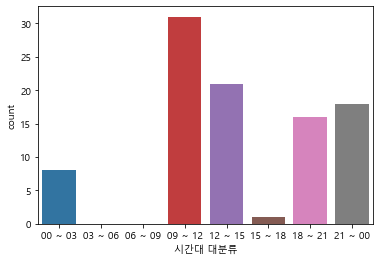

In [229]:
import seaborn as sns
sns.countplot(x='시간대 대분류', data=df_95, order=['00 ~ 03', '03 ~ 06', '06 ~ 09', '09 ~ 12', '12 ~ 15', '15 ~ 18', '18 ~ 21', '21 ~ 00'])

### 1번 방법인, 아이디 / 상품명으로 그룹화하는 경우에서, 가장 빈도수가 높은 2가지 조합에 대해 간단하게 살펴보았으며,
### 그 이외의 다른 회원들도 같은 방법으로 하여 개인 맞춤형 광고를 활성화하면 좋을 것 같다는 생각을 하였습니다.

# 2. 이번에는 아이디별로, 시간대, 유입채널 대분류로 그룹화하여 파악해보겠습니다. (좀 더 세분화)

In [32]:
df_up3_test2 = df_up3.groupby(['아이디', '주문월', '시간대 대분류', '판매자상품명', '유입채널 대분류']).count()
df_up3_cond2 = df_up3_test2[df_up3_test2['주문접수일시'] >= 2]
df_up3_cond2

주문접수일시  \
아이디       주문월 시간대 대분류 판매자상품명                                             유입채널 대분류           
-_-i****  5   03 ~ 06 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2              2   
              09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2              2   
                      [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                     2              2   
              15 ~ 18 비비고 새우왕교자 315G*2EA *2                              2              2   
-_-ing    8   09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2              3   
...                                                                                   ...   
zzong2250 8   21 ~ 00 [구매확정시 주문건당 5,000 Lpoint 자동적립] 스팸마일드8호 / *엘포인트 ... 1              2   
zzongroo  8   15 ~ 18 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1              2   
zzorock   8   12 ~ 15 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1              2   
zzx1832aa 9   12 ~ 15 비비고 사골곰탕 500g x18봉                                 2              3   
zzzz****  6   03 ~ 06 [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정  1              2   

                                                                                   주문번호  \
아이디       주문월 시간대 대분류 판매자상품명                                             유입채널 대분류         
-_-i****  5   03 ~ 06 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
              09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
                      [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                     2            2   
              15 ~ 18 비비고 새우왕교자 315G*2EA *2                              2            2   
-_-ing    8   09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            3   
...                                                                                 ...   
zzong2250 8   21 ~ 00 [구매확정시 주문건당 5,000 Lpoint 자동적립] 스팸마일드8호 / *엘포인트 ... 1            2   
zzongroo  8   15 ~ 18 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1            2   
zzorock   8   12 ~ 15 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1            2   
zzx1832aa 9   12 ~ 15 비비고 사골곰탕 500g x18봉                                 2            3   
zzzz****  6   03 ~ 06 [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정  1            2   

                                                                                   유입매체  \
아이디       주문월 시간대 대분류 판매자상품명                                             유입채널 대분류         
-_-i****  5   03 ~ 06 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
              09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
                      [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                     2            2   
              15 ~ 18 비비고 새우왕교자 315G*2EA *2                              2            2   
-_-ing    8   09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            3   
...                                                                                 ...   
zzong2250 8   21 ~ 00 [구매확정시 주문건당 5,000 Lpoint 자동적립] 스팸마일드8호 / *엘포인트 ... 1            2   
zzongroo  8   15 ~ 18 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1            2   
zzorock   8   12 ~ 15 [컵반 배그에디션]이겼닭! 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,00... 1            2   
zzx1832aa 9   12 ~ 15 비비고 사골곰탕 500g x18봉                                 2            3   
zzzz****  6   03 ~ 06 [6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280G  X 2개 증정  1            2   

                                                                                   주문구분  \
아이디       주문월 시간대 대분류 판매자상품명                                             유입채널 대분류         
-_-i****  5   03 ~ 06 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
              09 ~ 12 [CJ직배송]CJ비비고새우왕교자 315G*2EA X 2개                    2            2   
                      [CJ직배송]비비고 매운왕교자 385G*2EA X 2개                     2            2   
              15 ~ 18 비비고 새우왕교자 315G*2EA *2       

재구매 패턴을 파악할 수 있는 코드...
재구매 기간을 알아보고 그에 맞는 push 알림을 준다.

같은 아이디의 시간대를 파악하여서 어떤 시간대에 광고를 넣는 것이 좋은지 알아본다.

가격비교로 구매한 상품 중 많이 산 상품을 파악해서 가격대를 모니터링한다.